In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


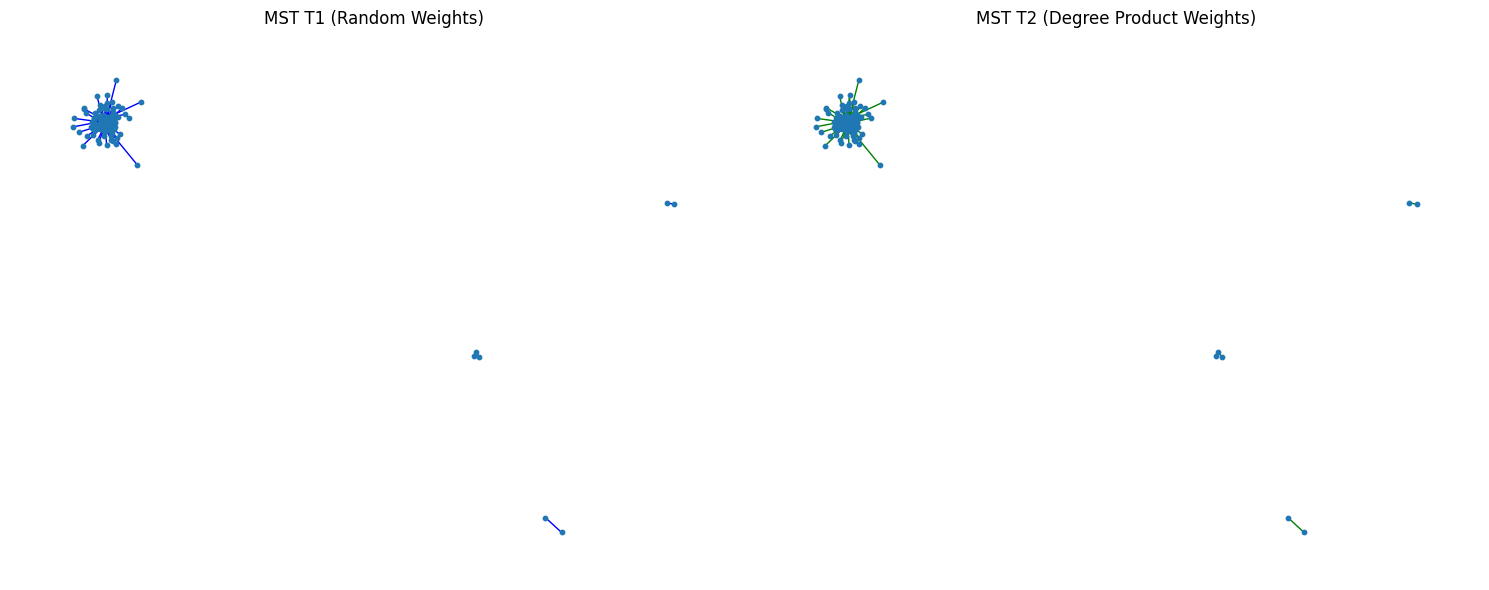

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# -----------------------------
# Kruskal's MST Algorithm
# -----------------------------
def Kruskal_MST(wtd_edgelist):
    def find_root(parent, i):
        if parent[i] != i:
            parent[i] = find_root(parent, parent[i])
        return parent[i]

    def forest_add_edge(parent, rank, x, y):
        xroot = find_root(parent, x)
        yroot = find_root(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
        return parent, rank

    result = []
    i, e = 0, 0
    wtd_edgelist = sorted(wtd_edgelist, key=lambda item: item[2])
    nodes = set([u for u, v, _ in wtd_edgelist] + [v for u, v, _ in wtd_edgelist])

    parent = {node: node for node in nodes}
    rank = {node: 0 for node in nodes}

    while e < len(nodes) - 1 and i < len(wtd_edgelist):
        u, v, w = wtd_edgelist[i]
        i += 1
        x = find_root(parent, u)
        y = find_root(parent, v)
        if x != y:
            e += 1
            result.append([u, v, w])
            parent, rank = forest_add_edge(parent, rank, x, y)

    return result

# -----------------------------
# Load Caltech Graph (Upload file first!)
# -----------------------------
G = nx.read_edgelist("../Data/Caltech36.txt", delimiter=",", nodetype=int)

# (i) Assign random weights ~ Uniform(0,1)
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0, 1)

wtd_edgelist_random = [[u, v, G[u][v]['weight']] for u, v in G.edges()]
T1_edges = Kruskal_MST(wtd_edgelist_random)

T1 = nx.Graph()
for u, v, w in T1_edges:
    T1.add_edge(u, v, weight=w)

# (ii) Assign weight = deg(u) * deg(v)
for u, v in G.edges():
    G[u][v]['weight'] = G.degree[u] * G.degree[v]

wtd_edgelist_deg = [[u, v, G[u][v]['weight']] for u, v in G.edges()]
T2_edges = Kruskal_MST(wtd_edgelist_deg)

T2 = nx.Graph()
for u, v, w in T2_edges:
    T2.add_edge(u, v, weight=w)

# (iii) Plot the two MSTs
pos = nx.spring_layout(G, seed=42)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("MST T1 (Random Weights)")
nx.draw(T1, pos, ax=axes[0], node_size=10, edge_color='blue', with_labels=False)

axes[1].set_title("MST T2 (Degree Product Weights)")
nx.draw(T2, pos, ax=axes[1], node_size=10, edge_color='green', with_labels=False)

plt.tight_layout()
plt.show()

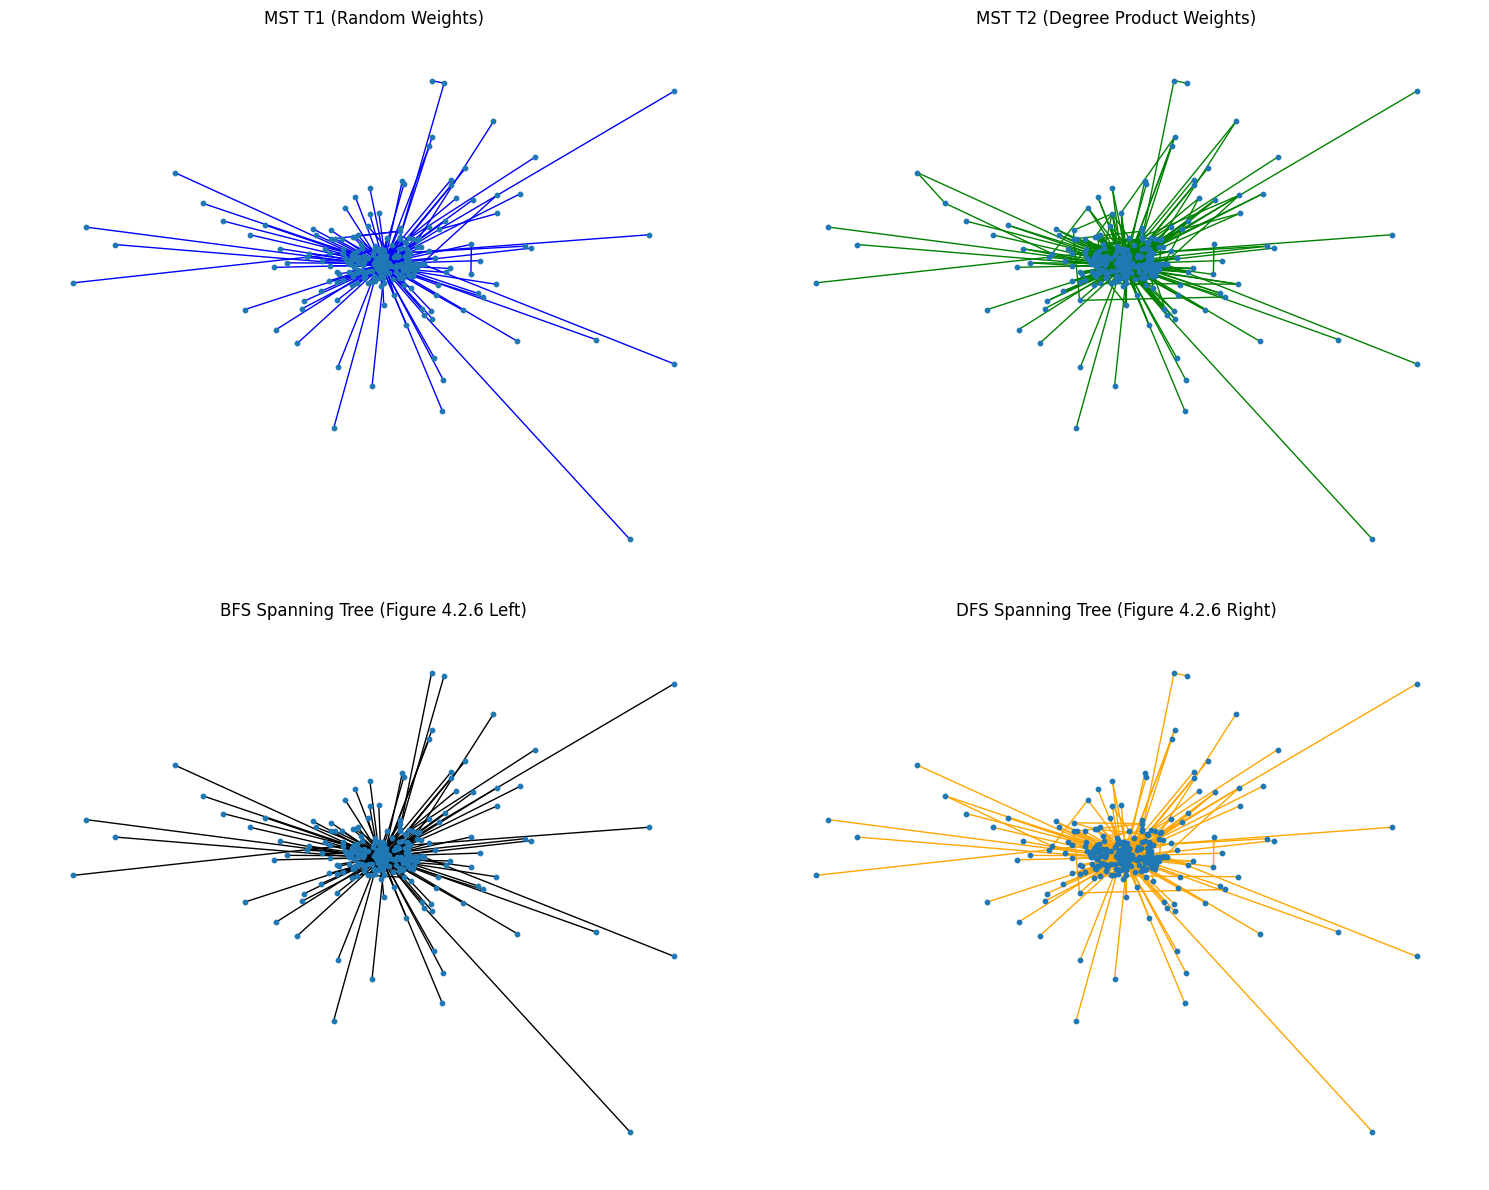

In [ ]:
# Final version of full script with:
# - proper Kruskal MST fix for arbitrary labels
# - BFS and DFS tree construction (Figure 4.2.6 style)

import networkx as nx
import matplotlib.pyplot as plt
import random

# -----------------------------
# Updated Kruskal that supports arbitrary labels
# -----------------------------
def Kruskal_MST(wtd_edgelist):
    def find_root(parent, i):
        if parent[i] != i:
            parent[i] = find_root(parent, parent[i])
        return parent[i]

    def forest_add_edge(parent, rank, x, y):
        xroot = find_root(parent, x)
        yroot = find_root(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
        return parent, rank

    result = []
    i, e = 0, 0
    wtd_edgelist = sorted(wtd_edgelist, key=lambda item: item[2])
    nodes = set([u for u, v, _ in wtd_edgelist] + [v for u, v, _ in wtd_edgelist])
    parent = {node: node for node in nodes}
    rank = {node: 0 for node in nodes}

    while e < len(nodes) - 1 and i < len(wtd_edgelist):
        u, v, w = wtd_edgelist[i]
        i += 1
        x = find_root(parent, u)
        y = find_root(parent, v)
        if x != y:
            e += 1
            result.append([u, v, w])
            parent, rank = forest_add_edge(parent, rank, x, y)
    return result

# -----------------------------
# BFS and DFS spanning trees
# -----------------------------
def Spanning_tree_BFS(G, s):
    queue = []
    visited = []
    edges_T = []
    visited.append(s)
    queue.append(s)
    while len(queue) > 0:
        v = queue.pop(0)
        for u in G.neighbors(v):
            if u not in visited:
                visited.append(u)
                queue.append(u)
                edges_T.append([v, u])
    return visited, edges_T

def Spanning_tree_DFS(G, s, visited=None, edges_T=None):
    if visited is None:
        visited = []
        edges_T = []
    if s not in visited:
        visited.append(s)
        for u in sorted(G.neighbors(s)):
            if u not in visited:
                edges_T.append([s, u])
                visited, edges_T = Spanning_tree_DFS(G, u, visited=visited, edges_T=edges_T)
    return visited, edges_T

# -----------------------------
# Load Caltech Graph (CSV-style)
# -----------------------------
G = nx.read_edgelist("../Data/Caltech36.txt", delimiter=",", nodetype=int)
G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

# -----------------------------
# Random MST (T1) via Kruskal
# -----------------------------
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0, 1)
wtd_edgelist_random = [[u, v, G[u][v]['weight']] for u, v in G.edges()]
T1_edges = Kruskal_MST(wtd_edgelist_random)
T1 = nx.Graph()
for u, v, w in T1_edges:
    T1.add_edge(u, v, weight=w)

# -----------------------------
# Degree-product MST (T2)
# -----------------------------
for u, v in G.edges():
    G[u][v]['weight'] = G.degree[u] * G.degree[v]
wtd_edgelist_deg = [[u, v, G[u][v]['weight']] for u, v in G.edges()]
T2_edges = Kruskal_MST(wtd_edgelist_deg)
T2 = nx.Graph()
for u, v, w in T2_edges:
    T2.add_edge(u, v, weight=w)

# -----------------------------
# BFS and DFS spanning trees
# -----------------------------
# Use highest-degree node for BFS (for hub-like centrality)
start_node_bfs = max(G.nodes, key=lambda x: G.degree[x])
_, bfs_edges = Spanning_tree_BFS(G, start_node_bfs)

# Use lowest-degree node for DFS (to force long chains)
start_node_dfs = min(G.nodes, key=lambda x: G.degree[x])
_, dfs_edges = Spanning_tree_DFS(G, start_node_dfs)

# Build graphs
T_BFS = nx.Graph()
T_BFS.add_edges_from(bfs_edges)

T_DFS = nx.Graph()
T_DFS.add_edges_from(dfs_edges)

# -----------------------------
# Plot all spanning trees
# -----------------------------
pos = nx.spring_layout(G, seed=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0][0].set_title("MST T1 (Random Weights)")
nx.draw(T1, pos, ax=axes[0][0], node_size=10, edge_color='blue', with_labels=False)

axes[0][1].set_title("MST T2 (Degree Product Weights)")
nx.draw(T2, pos, ax=axes[0][1], node_size=10, edge_color='green', with_labels=False)

axes[1][0].set_title("BFS Spanning Tree (Figure 4.2.6 Left)")
nx.draw(T_BFS, pos, ax=axes[1][0], node_size=10, edge_color='black', with_labels=False)

axes[1][1].set_title("DFS Spanning Tree (Figure 4.2.6 Right)")
nx.draw(T_DFS, pos, ax=axes[1][1], node_size=10, edge_color='orange', with_labels=False)

plt.tight_layout()
plt.show()